# Regression Decision Tree

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
import pandas as pd
df = pd.read_csv('2019_kbo_hitter.csv')
df.head()

,batter_name,age,G,PA,AB,R,H,2B,3B,HR,TB,RBI,SB,CS,BB,HBP,GB,SO,GDP,BU,fly,year,salary,war,year_born,cp,tp,1B,FBP,avg,OBP,SLG,OPS,p_year,YAB,YOPS
0,백용환,24,26,58,52,4,9,4,0,0,13,3,0,0,6,0,0,16,3,0,0,2013,2500,-0.055,1989-03-20,포수,포수,5,6,0.173,0.259,0.250,0.509,2014,79,0.580
1,백용환,25,47,86,79,8,14,2,0,4,28,10,0,0,5,0,0,28,1,2,0,2014,2900,-0.441,1989-03-20,포수,포수,8,5,0.177,0.226,0.354,0.580,2015,154,0.784
2,백용환,26,65,177,154,22,36,6,0,10,72,30,3,1,19,1,0,47,5,0,3,2015,6000,0.783,1989-03-20,포수,포수,20,20,0.234,0.316,0.468,0.784,2016,174,0.581
3,백용환,27,80,199,174,12,34,7,0,4,53,15,2,1,19,1,1,52,6,3,2,2016,6000,-0.405,1989-03-20,포수,포수,23,20,0.195,0.276,0.305,0.581,2017,17,0.476
4,백용환,28,15,20,17,2,3,0,0,0,3,1,0,0,3,0,0,3,2,0,0,2017,5500,-0.130,1989-03-20,포수,포수,3,3,0.176,0.300,0.176,0.476,2018,47,0.691


In [5]:
drop_columns = ['batter_name','year_born','cp','tp']
df.dropna(axis=0, inplace=True)
df.drop(drop_columns, axis=1, inplace=True)
df

,age,G,PA,AB,R,H,2B,3B,HR,TB,RBI,SB,CS,BB,HBP,GB,SO,GDP,BU,fly,year,salary,war,1B,FBP,avg,OBP,SLG,OPS,p_year,YAB,YOPS
0,24,26,58,52,4,9,4,0,0,13,3,0,0,6,0,0,16,3,0,0,2013,2500,-0.055,5,6,0.173,0.259,0.250,0.509,2014,79,0.580
1,25,47,86,79,8,14,2,0,4,28,10,0,0,5,0,0,28,1,2,0,2014,2900,-0.441,8,5,0.177,0.226,0.354,0.580,2015,154,0.784
2,26,65,177,154,22,36,6,0,10,72,30,3,1,19,1,0,47,5,0,3,2015,6000,0.783,20,20,0.234,0.316,0.468,0.784,2016,174,0.581
3,27,80,199,174,12,34,7,0,4,53,15,2,1,19,1,1,52,6,3,2,2016,6000,-0.405,23,20,0.195,0.276,0.305,0.581,2017,17,0.476
4,28,15,20,17,2,3,0,0,0,3,1,0,0,3,0,0,3,2,0,0,2017,5500,-0.130,3,3,0.176,0.300,0.176,0.476,2018,47,0.691
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1908,32,128,543,479,74,144,30,1,20,236,93,2,1,52,7,1,103,10,0,5,2018,30000,3.315,93,59,0.301,0.374,0.493,0.867,2019,395,0.768
1909,28,68,225,191,34,52,7,1,0,61,10,11,2,25,3,0,39,4,6,0,2017,3100,0.215,44,28,0.272,0.365,0.319,0.684,2018,13,0.154
1910,29,16,14,13,4,1,0,0,0,1,0,0,1,0,0,0,5,0,1,0,2018,6200,-0.271,1,0,0.077,0.077,0.077,0.154,2019,188,0.720
1911,27,70,299,279,37,87,17,2,11,141,46,8,2,12,4,1,48,4,0,4,2015,50000,2.365,57,16,0.312,0.344,0.505,0.849,2016,523,0.889


In [6]:
df.describe()

,age,G,PA,AB,R,H,2B,3B,HR,TB,RBI,SB,CS,BB,HBP,GB,SO,GDP,BU,fly,year,salary,war,1B,FBP,avg,OBP,SLG,OPS,p_year,YAB,YOPS
count,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000
mean,26.929973,80.361273,265.480637,231.707692,34.473740,64.928382,11.491247,1.114589,6.451459,98.003183,32.463660,5.779310,2.601061,24.158621,3.783024,0.909284,43.459947,5.269496,3.750133,2.064191,2011.041379,14278.734748,1.310336,45.871088,27.941645,0.247706,0.317582,0.362364,0.679946,2012.041379,243.780371,0.680381
std,4.530901,43.730725,194.986358,169.735610,29.100893,52.812598,10.168305,1.768930,8.481615,84.548834,30.651219,8.715429,3.158078,21.673797,4.178238,1.896399,31.933768,4.834912,4.816446,2.316427,6.006223,22570.606790,1.848115,36.842291,24.318913,0.087519,0.098075,0.153622,0.239738,6.006223,169.164973,0.217848
min,18.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1990.000000,1700.000000,-1.616000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1991.000000,1.000000,0.000000
25%,24.000000,42.000000,68.000000,62.000000,8.000000,14.000000,2.000000,0.000000,0.000000,19.000000,5.000000,0.000000,0.000000,5.000000,0.000000,0.000000,15.000000,1.000000,0.000000,0.000000,2008.000000,2700.000000,-0.048000,10.000000,6.000000,0.219000,0.290000,0.295000,0.590000,2009.000000,78.000000,0.593000
50%,27.000000,92.000000,259.000000,226.000000,29.000000,59.000000,10.000000,0.000000,3.000000,82.000000,25.000000,2.000000,2.000000,19.000000,3.000000,0.000000,42.000000,4.000000,2.000000,1.000000,2013.000000,5500.000000,0.538000,42.000000,23.000000,0.263000,0.333000,0.373000,0.707000,2014.000000,248.000000,0.705000
75%,30.000000,119.000000,443.000000,386.000000,55.000000,109.000000,19.000000,2.000000,9.000000,163.000000,51.000000,7.000000,4.000000,39.000000,6.000000,1.000000,65.000000,8.000000,6.000000,3.000000,2016.000000,15000.000000,2.348000,77.000000,44.000000,0.295000,0.371000,0.448000,0.813000,2017.000000,398.000000,0.809000
max,41.000000,144.000000,672.000000,576.000000,135.000000,201.000000,47.000000,17.000000,54.000000,373.000000,144.000000,65.000000,25.000000,112.000000,27.000000,25.000000,146.000000,24.000000,41.000000,13.000000,2018.000000,250000.000000,10.873000,142.000000,124.000000,1.000000,1.000000,3.000000,4.000000,2019.000000,576.000000,2.000000


In [7]:
y = df['salary']
x = df.drop(['salary'],axis=1)
y

0        2500
1        2900
2        6000
3        6000
4        5500
        ...  
1908    30000
1909     3100
1910     6200
1911    50000
1912    50000
Name: salary, Length: 1885, dtype: int64

In [8]:
x

,age,G,PA,AB,R,H,2B,3B,HR,TB,RBI,SB,CS,BB,HBP,GB,SO,GDP,BU,fly,year,war,1B,FBP,avg,OBP,SLG,OPS,p_year,YAB,YOPS
0,24,26,58,52,4,9,4,0,0,13,3,0,0,6,0,0,16,3,0,0,2013,-0.055,5,6,0.173,0.259,0.250,0.509,2014,79,0.580
1,25,47,86,79,8,14,2,0,4,28,10,0,0,5,0,0,28,1,2,0,2014,-0.441,8,5,0.177,0.226,0.354,0.580,2015,154,0.784
2,26,65,177,154,22,36,6,0,10,72,30,3,1,19,1,0,47,5,0,3,2015,0.783,20,20,0.234,0.316,0.468,0.784,2016,174,0.581
3,27,80,199,174,12,34,7,0,4,53,15,2,1,19,1,1,52,6,3,2,2016,-0.405,23,20,0.195,0.276,0.305,0.581,2017,17,0.476
4,28,15,20,17,2,3,0,0,0,3,1,0,0,3,0,0,3,2,0,0,2017,-0.130,3,3,0.176,0.300,0.176,0.476,2018,47,0.691
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1908,32,128,543,479,74,144,30,1,20,236,93,2,1,52,7,1,103,10,0,5,2018,3.315,93,59,0.301,0.374,0.493,0.867,2019,395,0.768
1909,28,68,225,191,34,52,7,1,0,61,10,11,2,25,3,0,39,4,6,0,2017,0.215,44,28,0.272,0.365,0.319,0.684,2018,13,0.154
1910,29,16,14,13,4,1,0,0,0,1,0,0,1,0,0,0,5,0,1,0,2018,-0.271,1,0,0.077,0.077,0.077,0.154,2019,188,0.720
1911,27,70,299,279,37,87,17,2,11,141,46,8,2,12,4,1,48,4,0,4,2015,2.365,57,16,0.312,0.344,0.505,0.849,2016,523,0.889


In [9]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [10]:
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor(random_state = 2021)
## DecisionTreeClassifier() 괄호 안에 넣을 수 있는 것들:
# criterion = 'mse' 또는 'mae' (default='mse')
# max_depth = None (default)
# min_samples_leaf = 1 (default)
# min_samples_split = None (default)
# random_state = None (default)

tree_fit = tree.fit(train_x, train_y)
tree_fit

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=2021, splitter='best')

In [11]:
from sklearn.pipeline import make_pipeline
pipe_tree = make_pipeline(DecisionTreeRegressor(random_state=2021)) # default model로 시작
# pipeline은 hyper-parameter 값을 바꾸면서 여러 모델을 사용 가능.

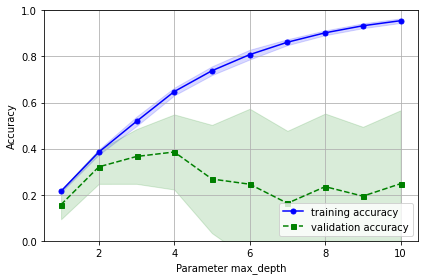

In [12]:
from sklearn.model_selection import validation_curve

param_range = [1,2,3,4,5,6,7,8,9,10] # max_depth 범위 설정
train_scores, validation_scores = validation_curve(estimator = pipe_tree, #기본모형 선택
                                                   X = train_x,
                                                   y = train_y,
                                                   param_name = 'decisiontreeregressor__max_depth', #pipe_tree.get_params().keys()에서
                                                   param_range=param_range,
                                                   cv=10)

train_mean = np.mean(train_scores, axis = 1)
train_std = np.std(train_scores, axis = 1)
validation_mean = np.mean(validation_scores, axis = 1)
validation_std = np.std(validation_scores, axis = 1)

plt.plot(param_range, train_mean,
        color='blue', marker='o',
        markersize=5, label='training accuracy')
plt.fill_between(param_range, 
                train_mean + train_std,
                train_mean - train_std,
                alpha=0.15,
                color='blue')
plt.plot(param_range, validation_mean,
        color='green', linestyle='--',
        marker='s', markersize=5,
        label='validation accuracy')
plt.fill_between(param_range,
                validation_mean + validation_std,
                validation_mean - validation_std,
                alpha=0.15, color='green')

plt.grid()
plt.xlabel('Number of max_depth')
plt.legend(loc='lower right')
plt.xlabel('Parameter max_depth')
plt.ylabel('Accuracy')
plt.ylim([0.00, 1.00]) # 보고싶은 구간 설정
plt.tight_layout()
plt.show()

In [13]:
from sklearn.model_selection import GridSearchCV

# parameter선택은 pipe_tree.get_params().keys() 에서 고르기.

param_range1 = [1,2,3,4,5,6,7,8,9,10]
param_range2 = [1,2,4,8,16,32]
param_range3 = ['mse', 'mae']

param_grid = [{'decisiontreeregressor__max_depth': param_range1,
              'decisiontreeregressor__min_samples_leaf': param_range2,
              'decisiontreeregressor__criterion': param_range3,
               }]

gs = GridSearchCV(estimator = pipe_tree,
                 param_grid = param_grid, # 찾고자하는 파라미터. dictionary 형식
                 scoring = 'neg_mean_squared_error', # Regression 일때 'neg_mean_squared_error','r2' 등
                 cv=10,
                 n_jobs= -1) # 병렬 처리갯수? -1은 전부를 의미

gs = gs.fit(train_x, train_y)

print(-gs.best_score_)
print(gs.best_params_)

278606767.08326125
{'decisiontreeregressor__criterion': 'mse', 'decisiontreeregressor__max_depth': 5, 'decisiontreeregressor__min_samples_leaf': 8}


In [14]:
best_tree = gs.best_estimator_ # 최적의 파라미터로 모델 생성
best_tree.fit(train_x, train_y)

Pipeline(memory=None,
         steps=[('decisiontreeregressor',
                 DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                       max_depth=5, max_features=None,
                                       max_leaf_nodes=None,
                                       min_impurity_decrease=0.0,
                                       min_impurity_split=None,
                                       min_samples_leaf=8, min_samples_split=2,
                                       min_weight_fraction_leaf=0.0,
                                       presort='deprecated', random_state=2021,
                                       splitter='best'))],
         verbose=False)

In [15]:
best_tree_for_graph = DecisionTreeRegressor(criterion='mse', max_depth=5, min_samples_leaf=8,random_state = 2021)
best_tree_for_graph.fit(train_x, train_y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=5,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=8, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=2021, splitter='best')

In [16]:
y_pred = tree.predict(test_x)

In [17]:
from sklearn.metrics import r2_score, mean_squared_error
print('R squared: %.3f' % r2_score(test_y, y_pred))
print('MSE: %.3f' % mean_squared_error(test_y,y_pred))

# 참고: https://scikit-learn.org/stable/modules/classes.html?highlight=sklearn%20metrics#module-sklearn.metrics

R squared: 0.328
MSE: 368385941.645


In [18]:
import numpy as np
feature_names = train_x.columns.tolist()
target_name = np.array(['salary'])

In [19]:
from pydotplus import graph_from_dot_data
from sklearn.tree import export_graphviz
from IPython.display import Image # CART Tree 그림
import pydotplus
import os
os.environ['PATH'] += os.pathsep + 'C:/Program Files/Graphviz/bin'

dot_data_best = export_graphviz(best_tree_for_graph,
                          filled = True,
                          rounded = True,
                          class_names = target_name,
                          feature_names = feature_names,
                          out_file = None)

graph_best = graph_from_dot_data(dot_data_best)
graph_best.write_png('tree_best_regression.png') #Tree 이미지를 저장

True

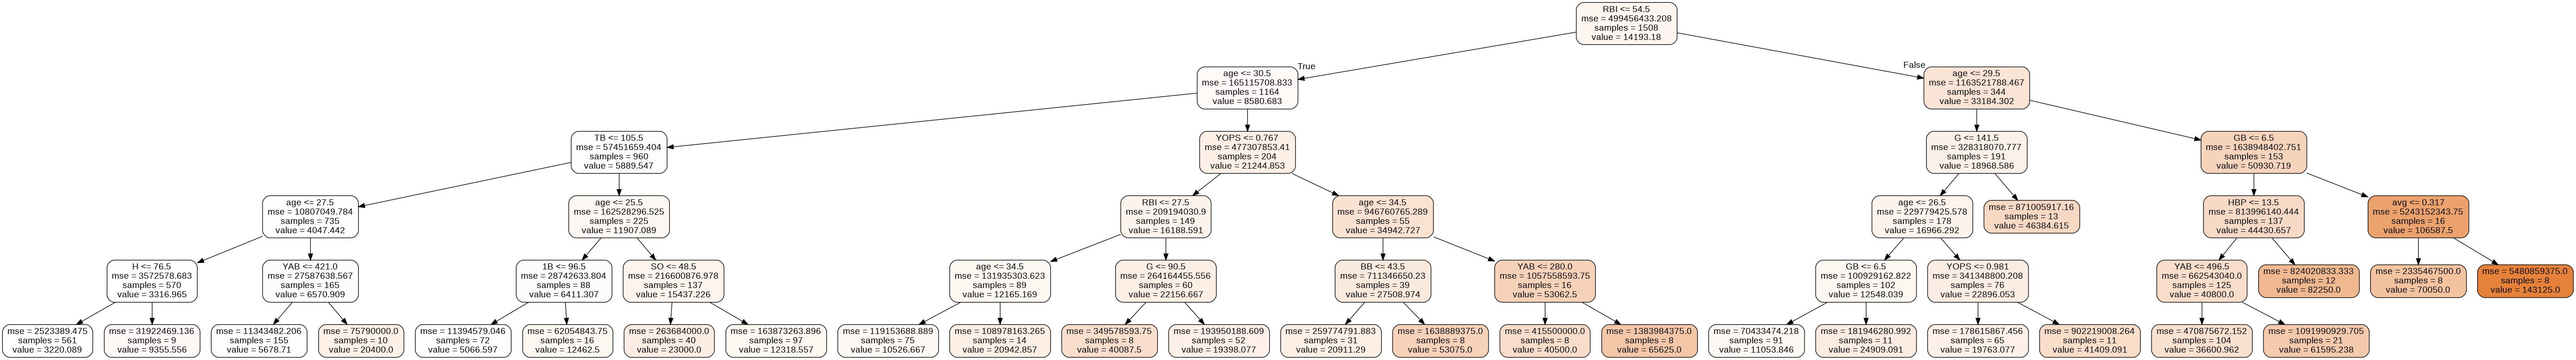

In [20]:
dt_graph_best = pydotplus.graph_from_dot_data(dot_data_best)
Image(dt_graph_best.create_png())

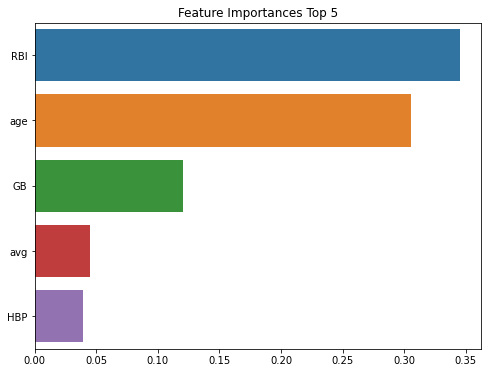

In [21]:
# Feature Importance

import seaborn as sns
feature_importance_values = best_tree_for_graph.feature_importances_
# Top 중요도로 정렬하고, 쉽게 시각화하기 위해 Series 변환
feature_importances = pd.Series(feature_importance_values, index=train_x.columns)
# 중요도값 순으로 Series를 정렬
feature_top5 = feature_importances.sort_values(ascending=False)[:5]

plt.figure(figsize=[8, 6])
plt.title('Feature Importances Top 5')
sns.barplot(x=feature_top5, y=feature_top5.index)
plt.show()

In [22]:
feature_importances.sort_values(ascending=False)

RBI       0.345041
age       0.305591
GB        0.120189
avg       0.044854
HBP       0.039502
YOPS      0.038926
YAB       0.032498
G         0.028250
TB        0.022346
BB        0.013814
SO        0.006785
1B        0.001504
H         0.000700
year      0.000000
HR        0.000000
OBP       0.000000
PA        0.000000
AB        0.000000
R         0.000000
2B        0.000000
3B        0.000000
p_year    0.000000
FBP       0.000000
fly       0.000000
SB        0.000000
CS        0.000000
SLG       0.000000
war       0.000000
GDP       0.000000
BU        0.000000
OPS       0.000000
dtype: float64